## converter no linux os dados em .grib2 para netcdf


cdo -f nc copy t2.03.2023111900.daily.grb2 temp2.nc



In [1]:
import xarray as xr
ds = xr.open_dataset('temp2.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 412, lon: 360, lat: 181, plev: 1)
Coordinates:
  * time     (time) datetime64[ns] 2023-11-19T06:00:00 ... 2024-03-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * plev     (plev) float64 200.0
Data variables:
    t        (time, plev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sat Nov 25 18:28:02 2023: cdo -f nc copy t2.03.2023111900.d...
    institution:  National Centers for Environmental Prediction
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [2]:
ds.coords['lon'] = ((ds.coords['lon'] + 180) % 360) - 180
ds = ds.sortby(ds.lon)
ds

<xarray.Dataset>
Dimensions:  (time: 412, lon: 360, lat: 181, plev: 1)
Coordinates:
  * time     (time) datetime64[ns] 2023-11-19T06:00:00 ... 2024-03-01
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * lat      (lat) float64 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * plev     (plev) float64 200.0
Data variables:
    t        (time, plev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sat Nov 25 18:28:02 2023: cdo -f nc copy t2.03.2023111900.d...
    institution:  National Centers for Environmental Prediction
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [3]:
import xarray as xr
import numpy as np
from matplotlib import cm



https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [6]:
Dado_temp=ds['t'] 
#Dado_temp=ds['t'] - 273.15

Teste_tmax=Dado_temp.sel(lon=np.arange(-25,-23,0.5), lat=np.arange(-60,-10,0.5),method='nearest', plev=1)


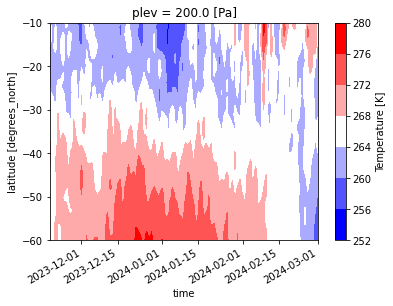

In [7]:
result_data = Teste_tmax.resample(time='1D').max(dim=('lon','time')).T.plot.contourf(cmap='bwr')


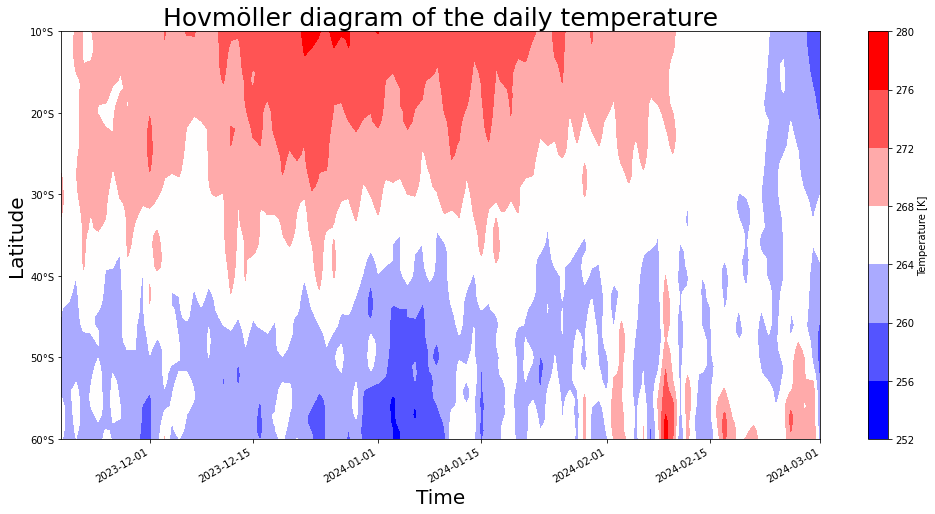

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 7.5))  # ajustando a figura

# Ajustando os limites do eixo y para manter o intervalo entre -60 e -10
plt.ylim(-60, -10)

# Seu código original para criar o gráfico
plot_data = Teste_tmax.resample(time='1D').max(dim=('lon', 'time')).T

# Criando o gráfico usando o método plot do xarray
plot = plot_data.plot.contourf(cmap='bwr')

# Invertendo o eixo y para ter a origem na parte inferior
plt.gca().invert_yaxis()

# Adicionando rótulos e título se necessário
# Adicionando rótulos personalizados para o eixo y
#plt.yticks([-60, -50, -40, -30, -20, -10], ['60°S', '50°S', '40°S', '30°S', '20°S', '10°S'])
plt.yticks([-60, -50, -40, -30, -20, -10], ['10°S', '20°S', '30°S', '40°S', '50°S', '60°S'])

# Add title
plt.title('Hovmöller diagram of the daily temperature', fontsize=25)

# Add labels for x and y axes
plt.xlabel('Time', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

# Mostrando o gráfico
plt.show()

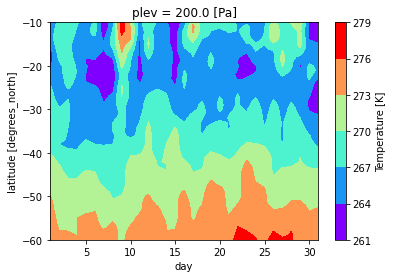

In [9]:
Teste_tmax.groupby('time.day').max(dim=('lon','time')).T.plot.contourf(cmap='rainbow')

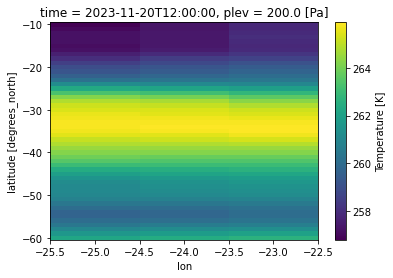

In [10]:
Teste_tmax[5].plot()

In [11]:

Dado_temp=ds['t'] - 273.15

Teste_tmax=Dado_temp.sel(lon=np.arange(-25,-23,0.5), lat=np.arange(-60,-10,0.5),method='nearest', plev=1)


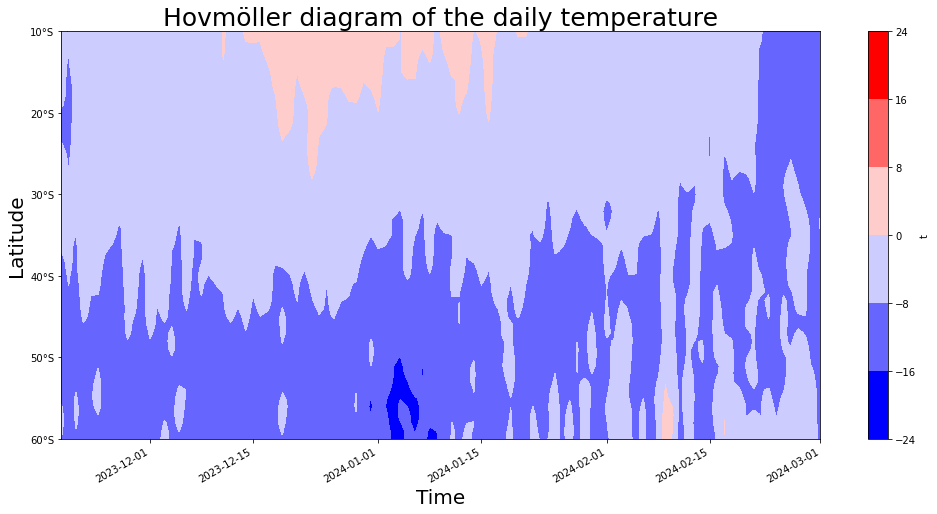

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 7.5))  # ajustando a figura

# Ajustando os limites do eixo y para manter o intervalo entre -60 e -10
plt.ylim(-60, -10)

# Seu código original para criar o gráfico
plot_data = Teste_tmax.resample(time='1D').max(dim=('lon', 'time')).T

# Criando o gráfico usando o método plot do xarray
plot = plot_data.plot.contourf(cmap='bwr')

# Invertendo o eixo y para ter a origem na parte inferior
plt.gca().invert_yaxis()

# Adicionando rótulos e título se necessário
# Adicionando rótulos personalizados para o eixo y
#plt.yticks([-60, -50, -40, -30, -20, -10], ['60°S', '50°S', '40°S', '30°S', '20°S', '10°S'])
plt.yticks([-60, -50, -40, -30, -20, -10], ['10°S', '20°S', '30°S', '40°S', '50°S', '60°S'])

# Add title
plt.title('Hovmöller diagram of the daily temperature', fontsize=25)

# Add labels for x and y axes
plt.xlabel('Time', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

# Mostrando o gráfico
plt.show()



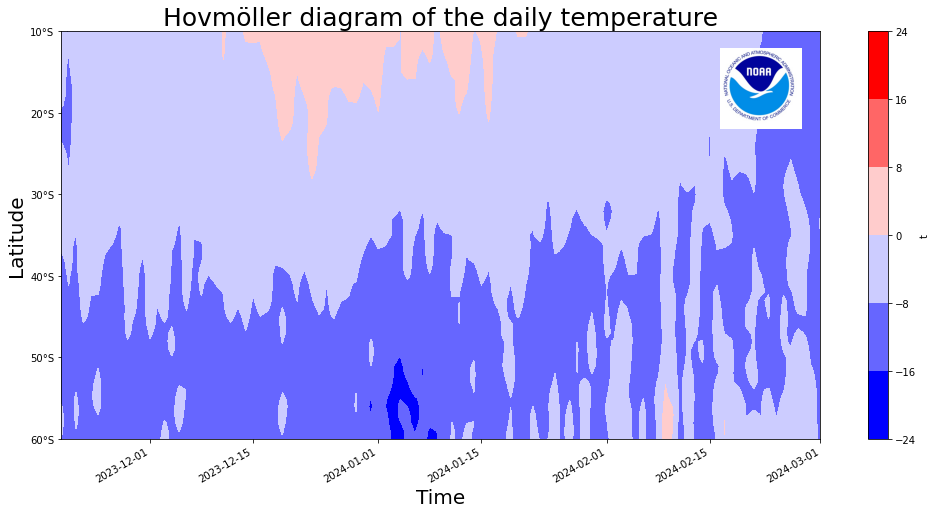

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17, 7.5))  # ajustando a figura

# Ajustando os limites do eixo y para manter o intervalo entre -60 e -10
plt.ylim(-60, -10)

# Seu código original para criar o gráfico
plot_data = Teste_tmax.resample(time='1D').max(dim=('lon', 'time')).T

# Criando o gráfico usando o método plot do xarray
plot = plot_data.plot.contourf(cmap='bwr')

# Invertendo o eixo y para ter a origem na parte inferior
plt.gca().invert_yaxis()

# Adicionando rótulos e título se necessário
# Adicionando rótulos personalizados para o eixo y
#plt.yticks([-60, -50, -40, -30, -20, -10], ['60°S', '50°S', '40°S', '30°S', '20°S', '10°S'])
plt.yticks([-60, -50, -40, -30, -20, -10], ['10°S', '20°S', '30°S', '40°S', '50°S', '60°S'])

# Add title
plt.title('Hovmöller diagram of the daily temperature', fontsize=25)

# Add labels for x and y axes
plt.xlabel('Time', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
# Mostra o plot
im_log1 = plt.imread(("loginho.jpg"))

#MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)
newax = fig.add_axes([0.23,0.7,0.5,0.15], anchor='NE',zorder=0)
newax.imshow(im_log1)

#    
newax.axis('off')
# Mostrando o gráfico

plt.savefig(f'hovmollerfigura.png', bbox_inches='tight', dpi=100)

plt.show()

